In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [32]:
start_up= pd.read_csv('50_Startups.csv')
start_up.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [33]:
start_up.rename(columns={'R&D Spend':'RD Spend'},inplace=True)

In [34]:
start_up.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RD Spend         50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [35]:
start_up.describe()

,RD Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [36]:
start_up.columns

Index(['RD Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [37]:
for x in ['RD Spend', 'Administration', 'Marketing Spend', 'State', 'Profit']:
    print(x,'-->',start_up[x].nunique())

RD Spend --> 49
Administration --> 50
Marketing Spend --> 48
State --> 3
Profit --> 50


In [38]:
start_up['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [39]:
start_up['State'].str.get_dummies()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


In [40]:
data=pd.concat([start_up,start_up['State'].str.get_dummies()],axis=1)
data

,RD Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0
5,131876.90,99814.71,362861.36,New York,156991.12,0,0,1
6,134615.46,147198.87,127716.82,California,156122.51,1,0,0
7,130298.13,145530.06,323876.68,Florida,155752.60,0,1,0
8,120542.52,148718.95,311613.29,New York,152211.77,0,0,1
9,123334.88,108679.17,304981.62,California,149759.96,1,0,0


In [41]:
data=data.drop(['State'],axis=1)

data

,RD Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [42]:
import seaborn as sns

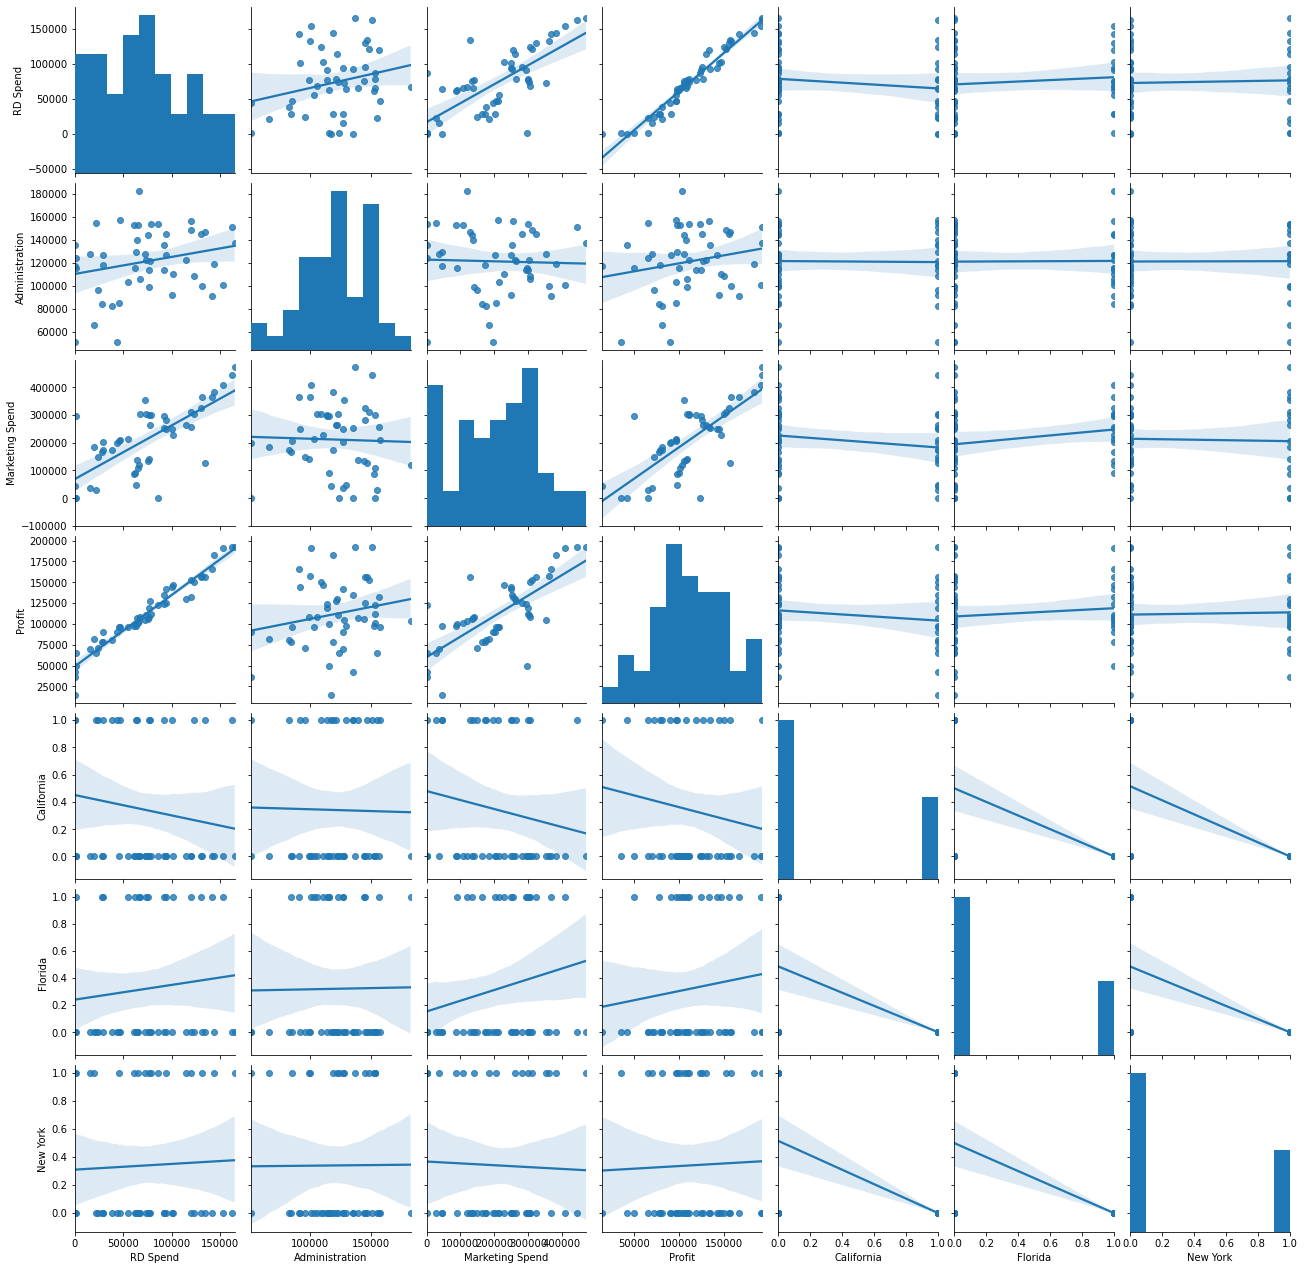

In [43]:
sns.pairplot(data,kind='reg')

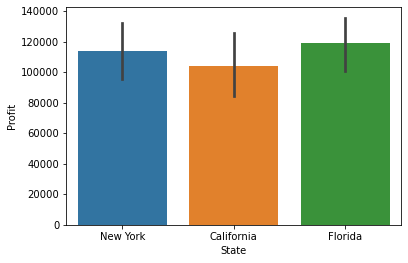

In [44]:
sns.barplot(x=start_up['State'],y=data['Profit'])
plt.show()
                 
            

In [45]:
data.columns

Index(['RD Spend', 'Administration', 'Marketing Spend', 'Profit', 'California',
       'Florida', 'New York'],
      dtype='object')

In [46]:
x=data[['RD Spend', 'Administration', 'Marketing Spend', 
       'California', 'Florida', 'New York']]

In [47]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RD Spend         50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   California       50 non-null     int64  
 4   Florida          50 non-null     int64  
 5   New York         50 non-null     int64  
dtypes: float64(3), int64(3)
memory usage: 2.5 KB


In [48]:
y=data['Profit']
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [49]:
from sklearn.model_selection  import train_test_split

In [50]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size= 0.25,random_state=10)

In [51]:
xtest.shape

(13, 6)

In [52]:
xtrain.shape

(37, 6)

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
model=LinearRegression()

In [55]:
model.fit(xtrain,ytrain)

LinearRegression()

In [56]:
model.coef_

array([ 7.94908963e-01, -9.24199896e-03,  2.26310528e-02,  3.33308401e+02,
        1.90646775e+02, -5.23955177e+02])

In [57]:
cols=x.columns
pd.DataFrame(model.coef_,columns=['coef'],index=cols)

,coef
RD Spend,0.794909
Administration,-0.009242
Marketing Spend,0.022631
California,333.308401
Florida,190.646775
New York,-523.955177


In [58]:
model.intercept_

49507.17141464805

In [59]:
model.score(xtrain,ytrain)

0.9311628200093645

In [60]:
ypred=model.predict(xtest)
ypred

array([ 88857.10256315, 109299.917912  ,  66680.29048672,  71093.30344769,
        48588.86436188, 116162.08653714, 171321.58471789,  99971.42533134,
       159257.65120978, 158377.46986063,  83684.48303465, 179967.05087583,
        75512.49992671])

In [61]:
 from sklearn.metrics import mean_absolute_error

In [62]:
mean_absolute_error(ytest,ypred)

3519.070317585486

In [63]:
final_model=model

In [64]:
pd.to_pickle(final_model,'start_up_profit')